In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/My Drive/DS320'
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/DS320
/content/drive/My Drive/DS320


In [ ]:
# Load csv files
GDP_Happiness_2015 = pd.read_csv("Happiness_2015.csv")
GDP_Happiness_2016 = pd.read_csv("Happiness_2016.csv")
GDP_Happiness_2017 = pd.read_csv("Happiness_2017.csv")
GDP_Happiness_2018 = pd.read_csv("Happiness_2018.csv")
GDP_Happiness_2019 = pd.read_csv("Happiness_2019.csv")
Suicide_before_modified = pd.read_csv("who_suicide_statistics.csv")

In [ ]:
# Pre-processing for GDP_Happiness Data : Remove unnecessary columns
GH2015 = GDP_Happiness_2015.drop(columns=['Region','Happiness Rank','Standard Error','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
GH2016 = GDP_Happiness_2016.drop(columns=['Region','Happiness Rank','Lower Confidence Interval','Upper Confidence Interval', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
GH2017 = GDP_Happiness_2017.drop(columns=['Happiness.Rank','Whisker.high','Whisker.low', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual'])
GH2018 = GDP_Happiness_2018.drop(columns=['Overall rank','Social support','Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
GH2019 = GDP_Happiness_2019.drop(columns=['Overall rank','Social support','Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
# Rename some columns with different name
GH2015 = GH2015.rename(columns={'Country':'country'})
GH2016 = GH2016.rename(columns={'Country':'country'})
GH2017 = GH2017.rename(columns={'Country':'country', 'Happiness.Score':'Happiness Score', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)'})
GH2018 = GH2018.rename(columns={'Country or region':'country', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)'})
GH2019 = GH2019.rename(columns={'Country or region':'country', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)'})
# Adding year variable into each dataframe
GH2015.insert(0, 'Year', '2015')
GH2016.insert(0, 'Year', '2016')
GH2017.insert(0, 'Year', '2017')
GH2018.insert(0, 'Year', '2018')
GH2019.insert(0, 'Year', '2019')

In [ ]:
GH = pd.concat([GH2015], ignore_index=True)

In [ ]:
# Pre-processing for Suicide Data : Remove unnecessary columns
Suicide = Suicide_before_modified.drop(columns=['sex', 'age'])
# Replace NaN values with zero(0)
Suicide = Suicide.replace(np.nan, 0)
# Calculate suicide rate
Suicide = Suicide.groupby(by=['country','year'], as_index = False).sum()
suicide_rate = (Suicide['suicides_no']/Suicide['population'])*100
Suicide.insert(2, 'suicide_rate(%)', suicide_rate)

In [ ]:
# Select specific years that we need to investigate
Suicide_2015_16 = Suicide.loc[Suicide['year'] == 2015]
# Remove missing data(population should be larger than zero(0))
Suicide_Final = Suicide_2015_16.loc[Suicide_2015_16['population'] > 0]
Suicide_Final

,country,year,suicide_rate(%),suicides_no,population
30,Albania,2015,0.000000,0.0,2719684.0
87,Antigua and Barbuda,2015,0.001088,1.0,91889.0
124,Argentina,2015,0.007741,3073.0,39699624.0
158,Armenia,2015,0.002647,74.0,2795335.0
179,Aruba,2015,0.009117,9.0,98712.0
...,...,...,...,...,...
3448,Ukraine,2015,0.018773,7574.0,40345446.0
3491,United Kingdom,2015,0.008038,4910.0,61082942.0
3529,United States of America,2015,0.014726,44189.0,300078511.0
3564,Uruguay,2015,0.019744,630.0,3190795.0


In [ ]:
# Merge two dataframe with left-join
Joined_data = pd.merge(Suicide_Final, GH, on='country', how='left')
Joined_data

,country,year,suicide_rate(%),suicides_no,population,Year,Happiness Score,Economy (GDP per Capita)
0,Albania,2015,0.000000,0.0,2719684.0,2015,4.959,0.87867
1,Antigua and Barbuda,2015,0.001088,1.0,91889.0,NaN,NaN,NaN
2,Argentina,2015,0.007741,3073.0,39699624.0,2015,6.574,1.05351
3,Armenia,2015,0.002647,74.0,2795335.0,2015,4.350,0.76821
4,Aruba,2015,0.009117,9.0,98712.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
68,Ukraine,2015,0.018773,7574.0,40345446.0,2015,4.681,0.79907
69,United Kingdom,2015,0.008038,4910.0,61082942.0,2015,6.867,1.26637
70,United States of America,2015,0.014726,44189.0,300078511.0,NaN,NaN,NaN
71,Uruguay,2015,0.019744,630.0,3190795.0,2015,6.485,1.06166


In [ ]:
# To find heterogeneity data
Heterogeneity = Joined_data[Joined_data['Economy (GDP per Capita)'].isna()]
Heterogeneity

,country,year,suicide_rate(%),suicides_no,population,Year,Happiness Score,Economy (GDP per Capita)
1,Antigua and Barbuda,2015,0.001088,1.0,91889.0,NaN,NaN,NaN
4,Aruba,2015,0.009117,9.0,98712.0,NaN,NaN,NaN
9,Belize,2015,0.008129,26.0,319835.0,NaN,NaN,NaN
11,Brunei Darussalam,2015,0.001823,7.0,384080.0,NaN,NaN,NaN
15,Cuba,2015,0.013949,1511.0,10832068.0,NaN,NaN,NaN
26,Grenada,2015,0.000000,0.0,96892.0,NaN,NaN,NaN
28,Hong Kong SAR,2015,0.014124,990.0,7009500.0,NaN,NaN,NaN
31,Iran (Islamic Rep of),2015,0.003273,2372.0,72460999.0,NaN,NaN,NaN
48,Puerto Rico,2015,0.006514,226.0,3469521.0,NaN,NaN,NaN
50,Republic of Korea,2015,0.027757,13510.0,48671752.0,NaN,NaN,NaN


Antigua and Barbuda -> x

Aruba -> x

Belize -> x

Brunei Darussalam -> x

Cuba -> x

Grenada	-> x

Hong Kong SAR -> Hong Kong

Iran (Islamic Rep of) -> Iran

Puerto Rico -> x

Republic of Korea -> South Korea

Republic of Moldova	-> Moldova

Rodrigues	-> x

Russian Federation -> Russia

Saint Vincent and Grenadines -> x

San Marino -> x

Seychelles	-> x

United States of America -> United States

Virgin Islands (USA) -> x

In [ ]:
from nltk.metrics import edit_distance
a = GH
b= Heterogeneity
List = Heterogeneity['country'].values.tolist()
x = b[['country']].rename(columns={'country':'Country'})
y = a[['country']]
result = (pd.concat([x, y], axis=0, ignore_index=True)).replace(np.nan, List[0]) # Change number in List[] for different countries
result["distance"] = result.loc[:, ["Country","country"]].apply(lambda x: edit_distance(*x), axis=1)
Final = result.loc[result['distance'] > 0]
sorted_result = Final.sort_values(["distance"], ascending=True)
sorted_result.head(5)

,Country,country,distance
58,Antigua and Barbuda,Trinidad and Tobago,13
158,Antigua and Barbuda,Uganda,14
14,San Marino,Antigua and Barbuda,14
73,Antigua and Barbuda,Lithuania,14
22,Antigua and Barbuda,Canada,14


In [ ]:
# Hong Kong SAR
result = (pd.concat([x, y], axis=0, ignore_index=True)).replace(np.nan, List[6]) # Change number in List[] for different countries
result["distance"] = result.loc[:, ["Country","country"]].apply(lambda x: edit_distance(*x), axis=1)
Final = result.loc[result['distance'] > 0]
sorted_result = Final.sort_values(["distance"], ascending=True)
sorted_result.head(5)

,Country,country,distance
89,Hong Kong SAR,Hong Kong,4
117,Hong Kong SAR,Mongolia,9
175,Hong Kong SAR,Togo,10
100,Hong Kong SAR,Montenegro,10
91,Hong Kong SAR,Indonesia,10


In [ ]:
# Iran (Islamic Rep of)	
result = (pd.concat([x, y], axis=0, ignore_index=True)).replace(np.nan, List[7]) # Change number in List[] for different countries
result["distance"] = result.loc[:, ["Country","country"]].apply(lambda x: edit_distance(*x), axis=1)
Final = result.loc[result['distance'] > 0]
sorted_result = Final.sort_values(["distance"], ascending=True)
sorted_result.head(16)

,Country,country,distance
17,Virgin Islands (USA),Iran (Islamic Rep of),14
14,San Marino,Iran (Islamic Rep of),15
126,Iran (Islamic Rep of),Bangladesh,16
46,Iran (Islamic Rep of),France,16
108,Iran (Islamic Rep of),Somaliland region,16
42,Iran (Islamic Rep of),Panama,17
58,Iran (Islamic Rep of),Trinidad and Tobago,17
28,Iran (Islamic Rep of),Israel,17
29,Iran (Islamic Rep of),Costa Rica,17
41,Iran (Islamic Rep of),Singapore,17


In [ ]:
# Republic of Korea
result = (pd.concat([x, y], axis=0, ignore_index=True)).replace(np.nan, List[9]) # Change number in List[] for different countries
result["distance"] = result.loc[:, ["Country","country"]].apply(lambda x: edit_distance(*x), axis=1)
Final = result.loc[result['distance'] > 0]
sorted_result = Final.sort_values(["distance"], ascending=True)
sorted_result.head(5)

,Country,country,distance
10,Republic of Moldova,Republic of Korea,5
64,Republic of Korea,South Korea,10
41,Republic of Korea,Singapore,13
31,Republic of Korea,Mexico,13
52,Republic of Korea,Saudi Arabia,13


In [ ]:
# Republic of Moldova
result = (pd.concat([x, y], axis=0, ignore_index=True)).replace(np.nan, List[10]) # Change number in List[] for different countries
result["distance"] = result.loc[:, ["Country","country"]].apply(lambda x: edit_distance(*x), axis=1)
Final = result.loc[result['distance'] > 0]
sorted_result = Final.sort_values(["distance"], ascending=True)
sorted_result.head(5)

,Country,country,distance
9,Republic of Korea,Republic of Moldova,5
69,Republic of Moldova,Moldova,12
162,Republic of Moldova,Cambodia,15
64,Republic of Moldova,South Korea,15
81,Republic of Moldova,Russia,15


In [ ]:
# Russian Federation	
result = (pd.concat([x, y], axis=0, ignore_index=True)).replace(np.nan, List[12]) # Change number in List[] for different countries
result["distance"] = result.loc[:, ["Country","country"]].apply(lambda x: edit_distance(*x), axis=1)
Final = result.loc[result['distance'] > 0]
sorted_result = Final.sort_values(["distance"], ascending=True)
sorted_result.head(5)

,Country,country,distance
108,Russian Federation,Somaliland region,12
81,Russian Federation,Russia,12
169,Russian Federation,Burkina Faso,12
66,Russian Federation,Bahrain,13
150,Russian Federation,Cameroon,13


In [ ]:
# United States of America	
result = (pd.concat([x, y], axis=0, ignore_index=True)).replace(np.nan, List[16]) # Change number in List[] for different countries
result["distance"] = result.loc[:, ["Country","country"]].apply(lambda x: edit_distance(*x), axis=1)
Final = result.loc[result['distance'] > 0]
sorted_result = Final.sort_values(["distance"], ascending=True)
sorted_result.head(5)

,Country,country,distance
32,United States of America,United States,11
37,United States of America,United Arab Emirates,14
38,United States of America,United Kingdom,15
130,United States of America,South Africa,16
9,Republic of Korea,United States of America,17


In [ ]:
# Replace country names with matching names
Suicide_Final['country'] = Suicide_Final['country'].replace(['Hong Kong SAR',
                                                             'Iran (Islamic Rep of)',
                                                             'Republic of Korea', 
                                                             'Republic of Moldova', 
                                                             'Russian Federation', 
                                                             'United States of America'],
                                                            ['Hong Kong',
                                                             'Iran',
                                                             'South Korea',
                                                             'Moldova',
                                                             'Russia',
                                                             'United States'])
Suicide_Final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,country,year,suicide_rate(%),suicides_no,population
30,Albania,2015,0.000000,0.0,2719684.0
87,Antigua and Barbuda,2015,0.001088,1.0,91889.0
124,Argentina,2015,0.007741,3073.0,39699624.0
158,Armenia,2015,0.002647,74.0,2795335.0
179,Aruba,2015,0.009117,9.0,98712.0
...,...,...,...,...,...
3448,Ukraine,2015,0.018773,7574.0,40345446.0
3491,United Kingdom,2015,0.008038,4910.0,61082942.0
3529,United States,2015,0.014726,44189.0,300078511.0
3564,Uruguay,2015,0.019744,630.0,3190795.0


In [ ]:
# Now, we can do inner join
Final_Join = pd.merge(Suicide_Final, GH, on='country', how='inner')
Final_Join

,country,year,suicide_rate(%),suicides_no,population,Year,Happiness Score,Economy (GDP per Capita)
0,Albania,2015,0.000000,0.0,2719684.0,2015,4.959,0.87867
1,Argentina,2015,0.007741,3073.0,39699624.0,2015,6.574,1.05351
2,Armenia,2015,0.002647,74.0,2795335.0,2015,4.350,0.76821
3,Australia,2015,0.013610,3027.0,22240785.0,2015,7.284,1.33358
4,Austria,2015,0.015220,1251.0,8219386.0,2015,7.200,1.33723
...,...,...,...,...,...,...,...,...
56,Turkmenistan,2015,0.002722,133.0,4886514.0,2015,5.548,0.95847
57,Ukraine,2015,0.018773,7574.0,40345446.0,2015,4.681,0.79907
58,United Kingdom,2015,0.008038,4910.0,61082942.0,2015,6.867,1.26637
59,United States,2015,0.014726,44189.0,300078511.0,2015,7.119,1.39451


In [ ]:
# To check our replacement works well
# There were 18 different countries, and we replaced 6 country names with maching name. So there should be 73-18+6=61 rows for Final_Join dataframe.
print("length of Suicide_Final: ", len(Suicide_Final))
print("length of Final_Join: ", len(Final_Join))

length of Suicide_Final:  73
length of Final_Join:  61


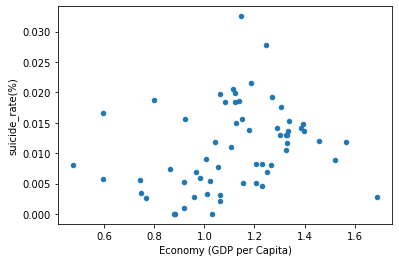

In [ ]:
Final_Join.plot.scatter(x='Economy (GDP per Capita)', y='suicide_rate(%)')

In [ ]:
# Export dataframe into csv format (This file goes to Google Drive)
Final_Join.to_csv('Final_Join.csv', index = False)